In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [2]:
bc = load_breast_cancer()
X = bc.data
y = bc.target

In [3]:
columns = bc.feature_names
columns

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87, stratify=y)

# K-Nearest Neighbors

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)

neighbors = np.arange(1, 21)

train_accuracy = {}
test_accuracy = {}

for n in neighbors:
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train)
  train_accuracy[n] = knn.score(X_train, y_train)
  test_accuracy[n] = knn.score(X_test, y_test)

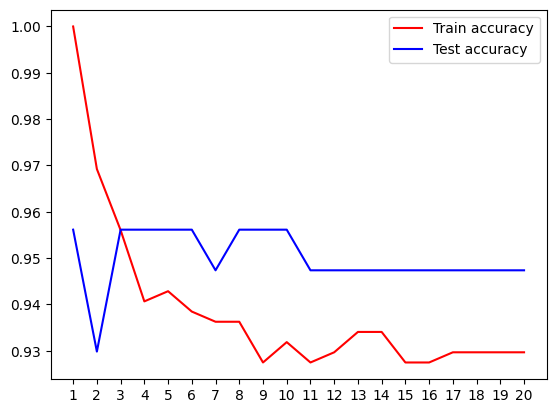

In [6]:

plt.xticks(np.arange(1, 21, 1))
plt.plot(
  list(train_accuracy.keys()), 
  list(train_accuracy.values()), 
  color='red',
  label='Train accuracy'
)
plt.plot(
  list(test_accuracy.keys()), 
  list(test_accuracy.values()),
  color='blue',
  label='Test accuracy'
)
plt.legend()

# Linear Regression

In [7]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
y_score = linreg.score(X_test, y_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {y_score}")
print(f"Coefficients: {linreg.coef_}")
print(f"Intercept: {linreg.intercept_}")

Mean squared error: 0.07178343591997331
R2 score: 0.6915021384867814
Coefficients: [ 2.22856095e-01 -3.87563004e-03 -3.17933336e-02 -8.71164476e-05
  7.08914159e-02  3.74670151e+00 -1.45230911e+00 -2.03418373e+00
 -4.53329753e-01  1.31918235e+01 -3.92772620e-01  6.91939648e-05
  7.47081996e-03 -2.08299619e-04 -1.80057565e+01  1.18711445e+00
  1.80049583e+00 -7.77382193e+00 -3.64942758e+00  2.06091669e+01
 -1.74840040e-01 -7.62751231e-03  6.49239309e-03  9.02239075e-04
 -6.08101943e-01 -6.62047487e-02 -8.70687426e-02 -8.34966773e-01
 -3.23721276e-01 -1.05236223e+01]
Intercept: 2.633247487990463


In [8]:
linreg_kfold = KFold(n_splits=5, shuffle=True, random_state=87)
linreg_kfold_scores = cross_val_score(linreg, X, y, cv=linreg_kfold)
print(f"Cross validation scores: {linreg_kfold_scores}")

Cross validation scores: [0.63372674 0.73971196 0.72787637 0.69850436 0.77499287]


In [9]:
print(f"Mean cross validation score: {np.mean(linreg_kfold_scores)}")
print(f"Standard deviation of cross validation scores: {np.std(linreg_kfold_scores)}")
print(f"95% confidence interval: {np.mean(linreg_kfold_scores) - 2 * np.std(linreg_kfold_scores)} - {np.mean(linreg_kfold_scores) + 2 * np.std(linreg_kfold_scores)}")

Mean cross validation score: 0.7149624588174948
Standard deviation of cross validation scores: 0.04744063044714324
95% confidence interval: 0.6200811979232083 - 0.8098437197117813


# Logistic Regression

In [10]:
logreg = LogisticRegression()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
y_score = logreg.score(X_test_scaled, y_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {y_score}")
print(f"Coefficients: {logreg.coef_}")
print(f"Intercept: {logreg.intercept_}")

Mean squared error: 0.017543859649122806
R2 score: 0.9824561403508771
Coefficients: [[-0.30831566 -0.351831   -0.31185578 -0.39870115 -0.09818675  0.41657707
  -0.71856394 -0.75098184 -0.26774669  0.57540307 -1.10562416  0.08802666
  -0.52160025 -1.07425038 -0.29504023  0.76179453  0.08609334 -0.39059496
   0.30834671  0.65291117 -0.79217623 -1.18256051 -0.67432847 -0.83880203
  -0.52098969 -0.06254616 -0.65291825 -1.07048301 -0.82524873 -0.70417034]]
Intercept: [0.31006406]


In [11]:
X_scaled = scaler.fit_transform(X)

logreg_kfold = KFold(n_splits=5, shuffle=True, random_state=87)
logreg_kfold_scores = cross_val_score(logreg, X_scaled, y, cv=logreg_kfold)
print(f"Cross validation scores: {logreg_kfold_scores}")

Cross validation scores: [0.96491228 0.97368421 0.95614035 0.97368421 0.98230088]


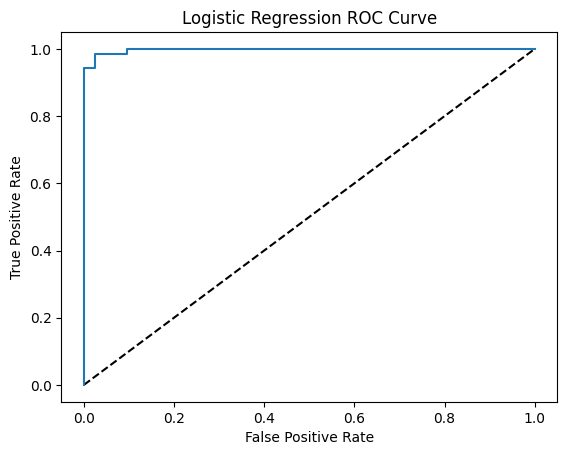

ROC AUC score: 0.9976851851851852


In [12]:
# plot the ROC AUC curve
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print(f"ROC AUC score: {roc_auc}")

In [13]:
print(f"Confusion matrix: {confusion_matrix(y_test, y_pred)}")
print(f"Classification report: {classification_report(y_test, y_pred)}")

Confusion matrix: [[41  1]
 [ 1 71]]
Classification report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Logistic Regression with Hyperparameter Tuning

Finding the best parameters for Logistic Regression can be done with `GridSearchCV` and `RandomizedSearchCV`. The latter is faster, but the former is more exhaustive.

In [14]:
logreg_params = {
  "tol": np.linspace(0.01, 1.0, 20),
  "C": np.linspace(0.01, 1.0, 20),
  "class_weight": ["balanced", {0:0.8, 1:0.2}],
  "solver": ["newton-cg", "newton-cholesky", "lbfgs", "liblinear", "sag", "saga"]
}

logreg_cv = GridSearchCV(logreg, logreg_params, cv=logreg_kfold)
logreg_cv.fit(X_scaled, y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.06210526315789474, 'class_weight': 'balanced', 'solver': 'newton-cg', 'tol': 0.01}
Tuned Logistic Regression Best Accuracy Score: 0.9789007918025151


In [15]:
logreg_params = {
  "tol": np.linspace(0.01, 1.0, 20),
  "C": np.linspace(0.01, 1.0, 20),
  "class_weight": ["balanced", {0:0.8, 1:0.2}],
  "solver": ["newton-cg", "newton-cholesky", "lbfgs", "liblinear", "sag", "saga"]
}

logreg_cv = RandomizedSearchCV(logreg, logreg_params, cv=logreg_kfold)
logreg_cv.fit(X_scaled, y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.06210526315789474, 'solver': 'newton-cholesky', 'class_weight': 'balanced', 'C': 0.06210526315789474}
Tuned Logistic Regression Best Accuracy Score: 0.9754075454122031


# Lasso Regression

In [16]:
lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
y_score = lasso.score(X_test, y_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {y_score}")

Mean squared error: 0.13144367265540696
R2 score: 0.4351051687071201


In [17]:
lasso_kfold = KFold(n_splits=5, shuffle=True, random_state=87)
lasso_kfold_scores = cross_val_score(lasso, X, y, cv=lasso_kfold)
print(f"Cross validation scores: {lasso_kfold_scores}")

Cross validation scores: [0.54893488 0.55672266 0.48917584 0.55993045 0.52570002]


In [18]:
lasso_params = {
    "alpha": [0.01, 1.0, 20], # Increase regularization strength (alpha) if needed
    "fit_intercept": [True, False],
    "precompute": [True, False],
    "selection": ["cyclic", "random"],
    "copy_X": [True, False],
    "max_iter": [1000, 5000],  # Increase the number of iterations
    "positive": [True, False],
    "random_state": [87],
    "tol": [0.0001, 0.001, 0.01, 0.1, 1.0],
    "warm_start": [True, False]
}

lasso_cv = RandomizedSearchCV(lasso, lasso_params, cv=lasso_kfold)
lasso_cv.fit(X_train_scaled, y_train)
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_))
print("Tuned Lasso Regression Best Accuracy Score: {}".format(lasso_cv.best_score_))

Tuned Lasso Regression Parameters: {'warm_start': True, 'tol': 0.001, 'selection': 'cyclic', 'random_state': 87, 'precompute': True, 'positive': True, 'max_iter': 1000, 'fit_intercept': True, 'copy_X': True, 'alpha': 1.0}
Tuned Lasso Regression Best Accuracy Score: -0.006195815907826185


# Ridge Regression

In [19]:
ridge = Ridge()

ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled.reshape(-1,1))
y_score = ridge.score(y_test, y_pred)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {y_score}")


ValueError: X has 1 features, but Ridge is expecting 30 features as input.

# ElasticNet Regression